In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import preprocessing

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import time

## Q1
#### First, read the dataset using the pandas library and convert it to a data frame

In [109]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Q2
#### First, delete the Cabin column and then delete the rows containing Null in this dataset

In [112]:
df.drop('Cabin', inplace=True, axis=1)

In [113]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [114]:
df2 = df.dropna()
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [116]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Q3
#### remove Passengerld, Name, Ticket, SibSp, Parch columns

In [117]:
df2.drop(columns=['PassengerId', 'Name','Ticket','SibSp','Parch'],inplace=True)

C:\Users\Win 10\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [118]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


## Q4
#### Convert categorical features to numbers using one Hot Encoding method

In [119]:
df3 = pd.get_dummies(df2, columns = ['Sex', 'Embarked'])
df3

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,29.1250,1,0,0,1,0
886,0,2,27.0,13.0000,0,1,0,0,1
887,1,1,19.0,30.0000,1,0,0,0,1
889,1,1,26.0,30.0000,0,1,1,0,0


## Q5
#### Set all columns except Survived to x and Survived to y

In [120]:
X = df3.drop('Survived', axis=1)
X

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,29.1250,1,0,0,1,0
886,2,27.0,13.0000,0,1,0,0,1
887,1,19.0,30.0000,1,0,0,0,1
889,1,26.0,30.0000,0,1,1,0,0


In [121]:
Y = df3['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

## Q6
#### Separate the data into two parts, train and test. (70% train data and 30% tes data).

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [123]:
X_train.shape

(498, 8)

In [124]:
X_test.shape

(214, 8)

## Q7
* Apply the decision tree model with random_state = 0 to the data.
* Determine the accuracy obtained for train and test separately.

In [125]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)
Y_train_prediction = model.predict(X_train)
Y_test_prediction = model.predict(X_test)
model_train_accuracy = metrics.accuracy_score(Y_train,Y_train_prediction)
model_test_accuracy = metrics.accuracy_score(Y_test,Y_test_prediction)
print('Decision Tree Accuracy for train data:',(model_train_accuracy*100).round(2),'%')
print('Decision Tree Accuracy for test data:',(model_test_accuracy*100).round(2),'%')
# accuracy = model.score(X_test, Y_test)
# print('Decision Tree Accuracy:',(accuracy*100).round(2),'%')

Decision Tree Accuracy for train data: 99.2 %
Decision Tree Accuracy for test data: 73.83 %


## Q8
#### Display the resulting tree with graphViz, pydotplus

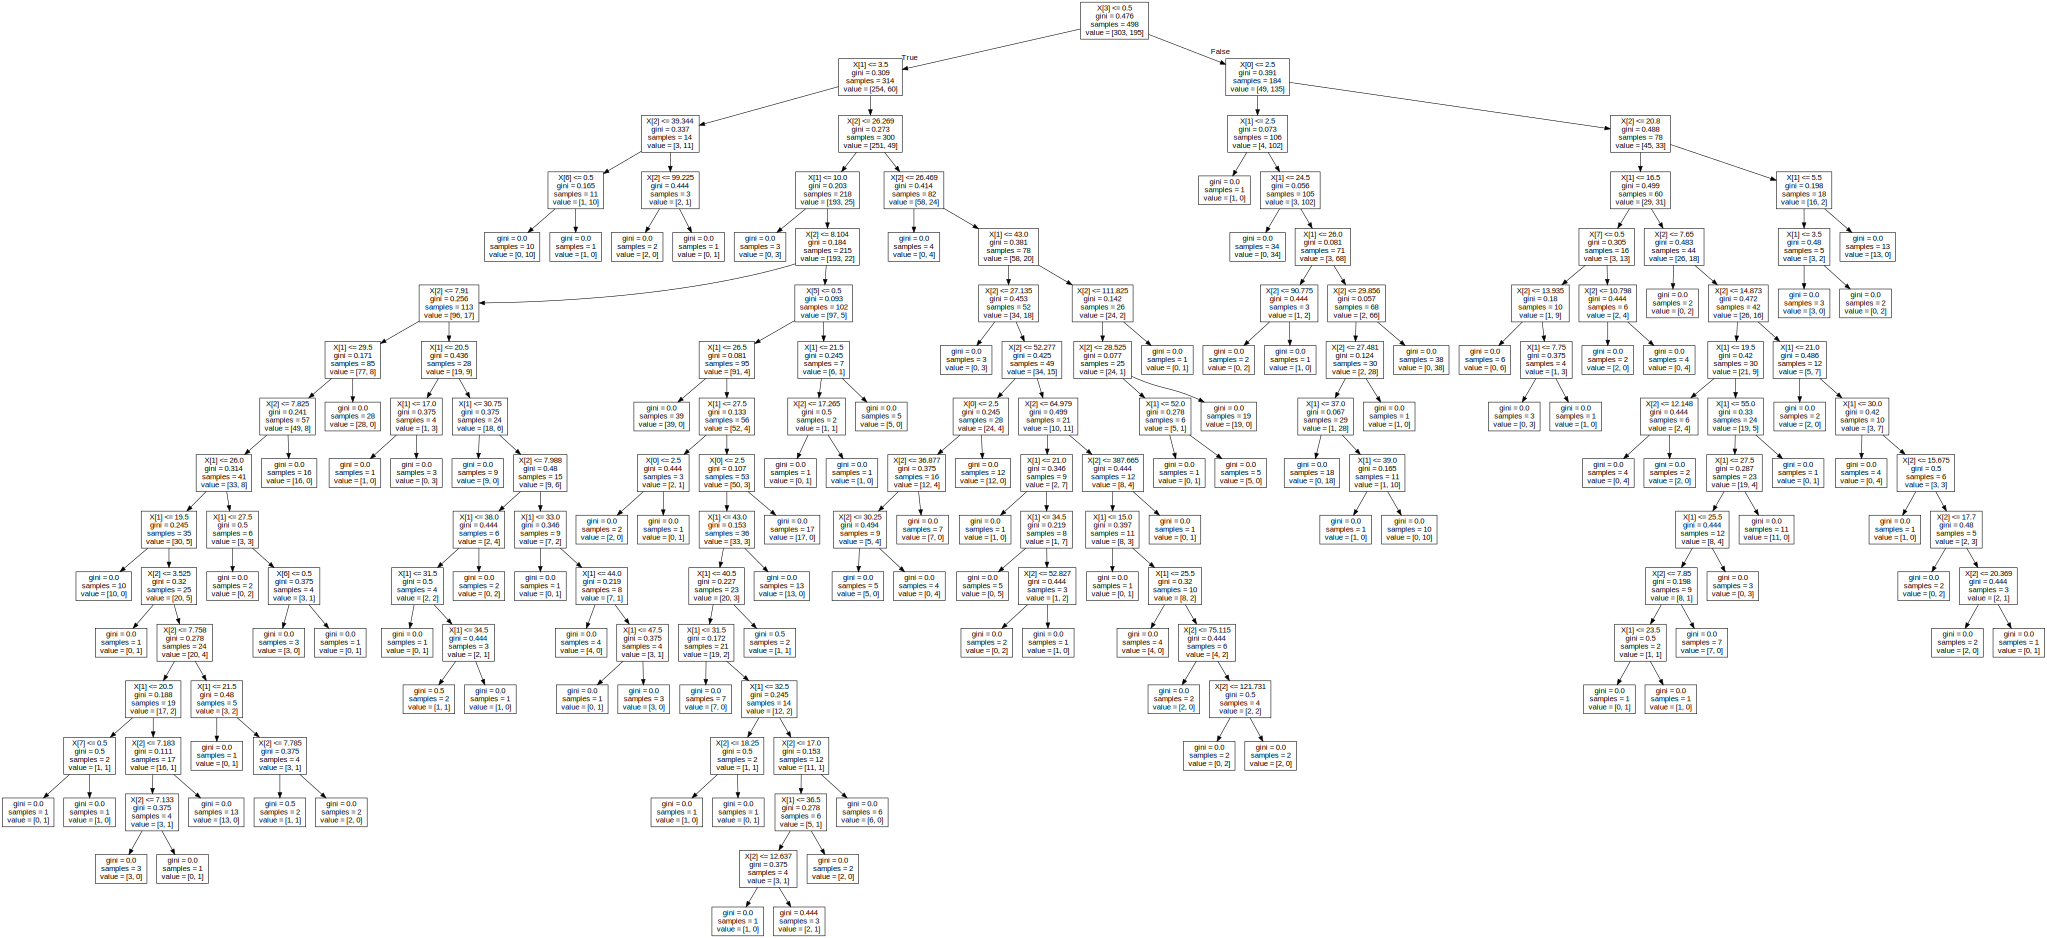

In [126]:
display(graphviz.Source(tree.export_graphviz(model)))

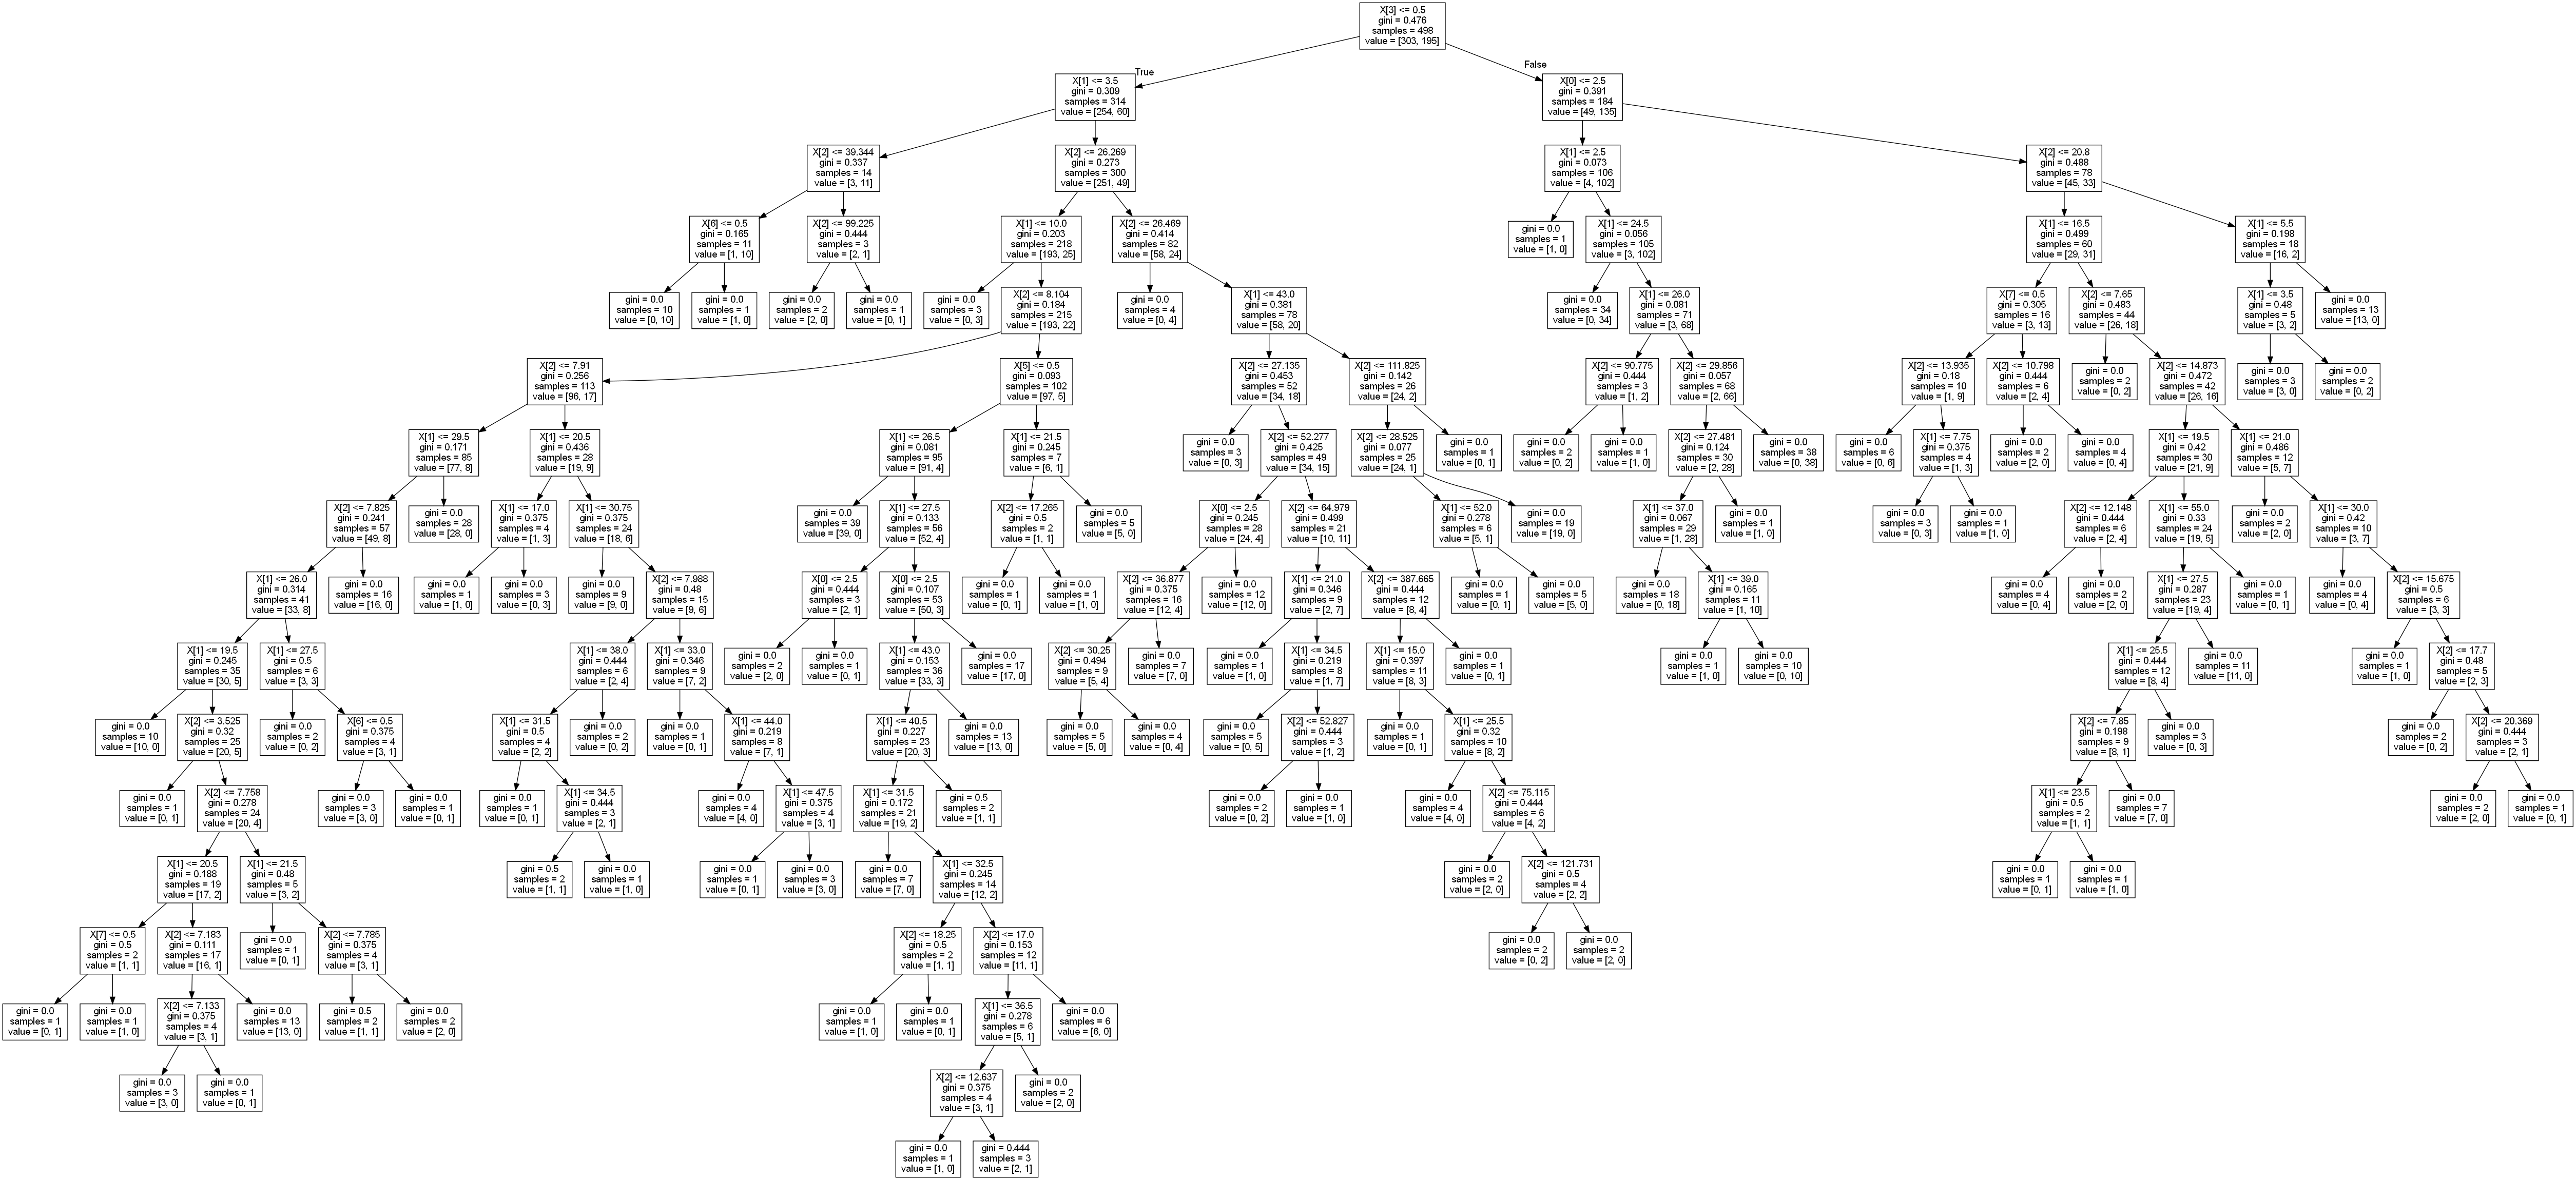

In [127]:
dot_data = tree.export_graphviz(model)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Q9
#### Has overfitting occurred?

Yes, overfitting has happened.

Since the accuracy of the training is higher than 98% and the accuracy of the test data is 75%, we conclude that the model suffers from overfitting on the training data and cannot make good decisions about the test data.

The solution is to adjust the hyperparameters of the decision tree appropriately.

In [128]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]

In [129]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train,Y_train)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_yhat)
    test_scores.append(test_acc)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.781, test: 0.776
>2, train: 0.821, test: 0.757
>3, train: 0.829, test: 0.790
>4, train: 0.863, test: 0.771
>5, train: 0.871, test: 0.776
>6, train: 0.890, test: 0.757
>7, train: 0.908, test: 0.734
>8, train: 0.928, test: 0.734
>9, train: 0.944, test: 0.729
>10, train: 0.966, test: 0.738
>11, train: 0.976, test: 0.743
>12, train: 0.984, test: 0.752
>13, train: 0.986, test: 0.738
>14, train: 0.990, test: 0.734
>15, train: 0.992, test: 0.729
>16, train: 0.992, test: 0.724
>17, train: 0.992, test: 0.738
>18, train: 0.992, test: 0.734
>19, train: 0.992, test: 0.724
>20, train: 0.992, test: 0.734


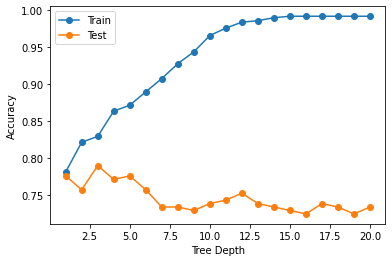

In [130]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Q10
#### Draw confusion matrix for test and interpret it

In [131]:
metrics.confusion_matrix(Y_test,Y_test_prediction)

array([[94, 27],
       [29, 64]], dtype=int64)

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


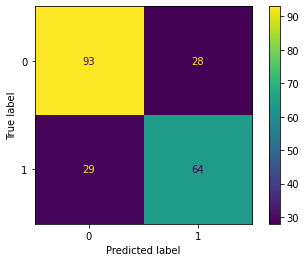

In [132]:
metrics.plot_confusion_matrix(model, X_test, Y_test) 
plt.show()

### result:
From the confusion matrix, we conclude that 105 of the samples are correctly recognized as belonging to class 0 and 55 of the data are correctly attributed to class 1.

Also, 31 of the data belong to class 1, but the model wrongly assigns them to class 0, and 55 of the data belong to class 0, but they are placed in class 1.

In [133]:
def plot_confusion_matrix(y,y_predict):
 cm = confusion_matrix(y, y_predict)
 ax= plt.subplot()
 sns.heatmap(cm, annot=True,fmt = " ", ax = ax)
 ax.set_xlabel('Predicted labels')
 ax.set_ylabel('True labels')
 ax.set_title('Confusion Matrix')
 ax.xaxis.set_ticklabels(['Not Survived','Survived']) 
 ax.yaxis.set_ticklabels(['Not Survived','Survived'])

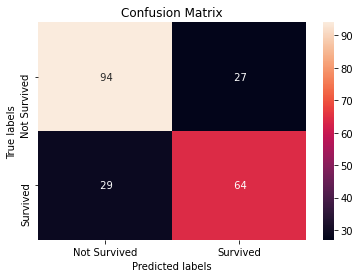

In [134]:
plot_confusion_matrix(Y_test,Y_test_prediction)

## Q11
#### Get the best value for max_depth and min_samples_leaf parameters using Grid Search

In [135]:
tree_params = {
 'criterion':['gini','entropy','log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [60, 70, 80, 90, 100, 110],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15],
 'max_features': [1, 2, 3, 4, 5],
#  'max_features': ['sqrt','log2']
}

model = DecisionTreeClassifier()
tree_grid_search = GridSearchCV(estimator = model,
                  param_grid = tree_params,cv=5 , n_jobs = -1, verbose = 2)
start = time.time()
tree_grid_search.fit(X_train, Y_train)
end = time.time()
tree_grid_search.best_params_

Fitting 5 folds for each of 27000 candidates, totalling 135000 fits


C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45000 fits failed out of a total of 135000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_

{'criterion': 'gini',
 'max_depth': 70,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [136]:
best_tree_model = DecisionTreeClassifier(random_state=0, max_depth=90, max_features=4, 
                             min_samples_leaf=7, min_samples_split=6)

best_tree_model.fit(X_train,Y_train)
Y_train_prediction = best_tree_model.predict(X_train)
Y_test_prediction = best_tree_model.predict(X_test)

train_accuracy = metrics.accuracy_score(Y_train,Y_train_prediction)
test_accuracy = metrics.accuracy_score(Y_test,Y_test_prediction)

print('Decision Tree Accuracy for train data:',(train_accuracy*100).round(2),'%')
print('Decision Tree Accuracy for test data:',(test_accuracy*100).round(2),'%')

Decision Tree Accuracy for train data: 86.14 %
Decision Tree Accuracy for test data: 78.04 %


## Q12
#### Display the best tree obtained by Grid Search using GraphViz

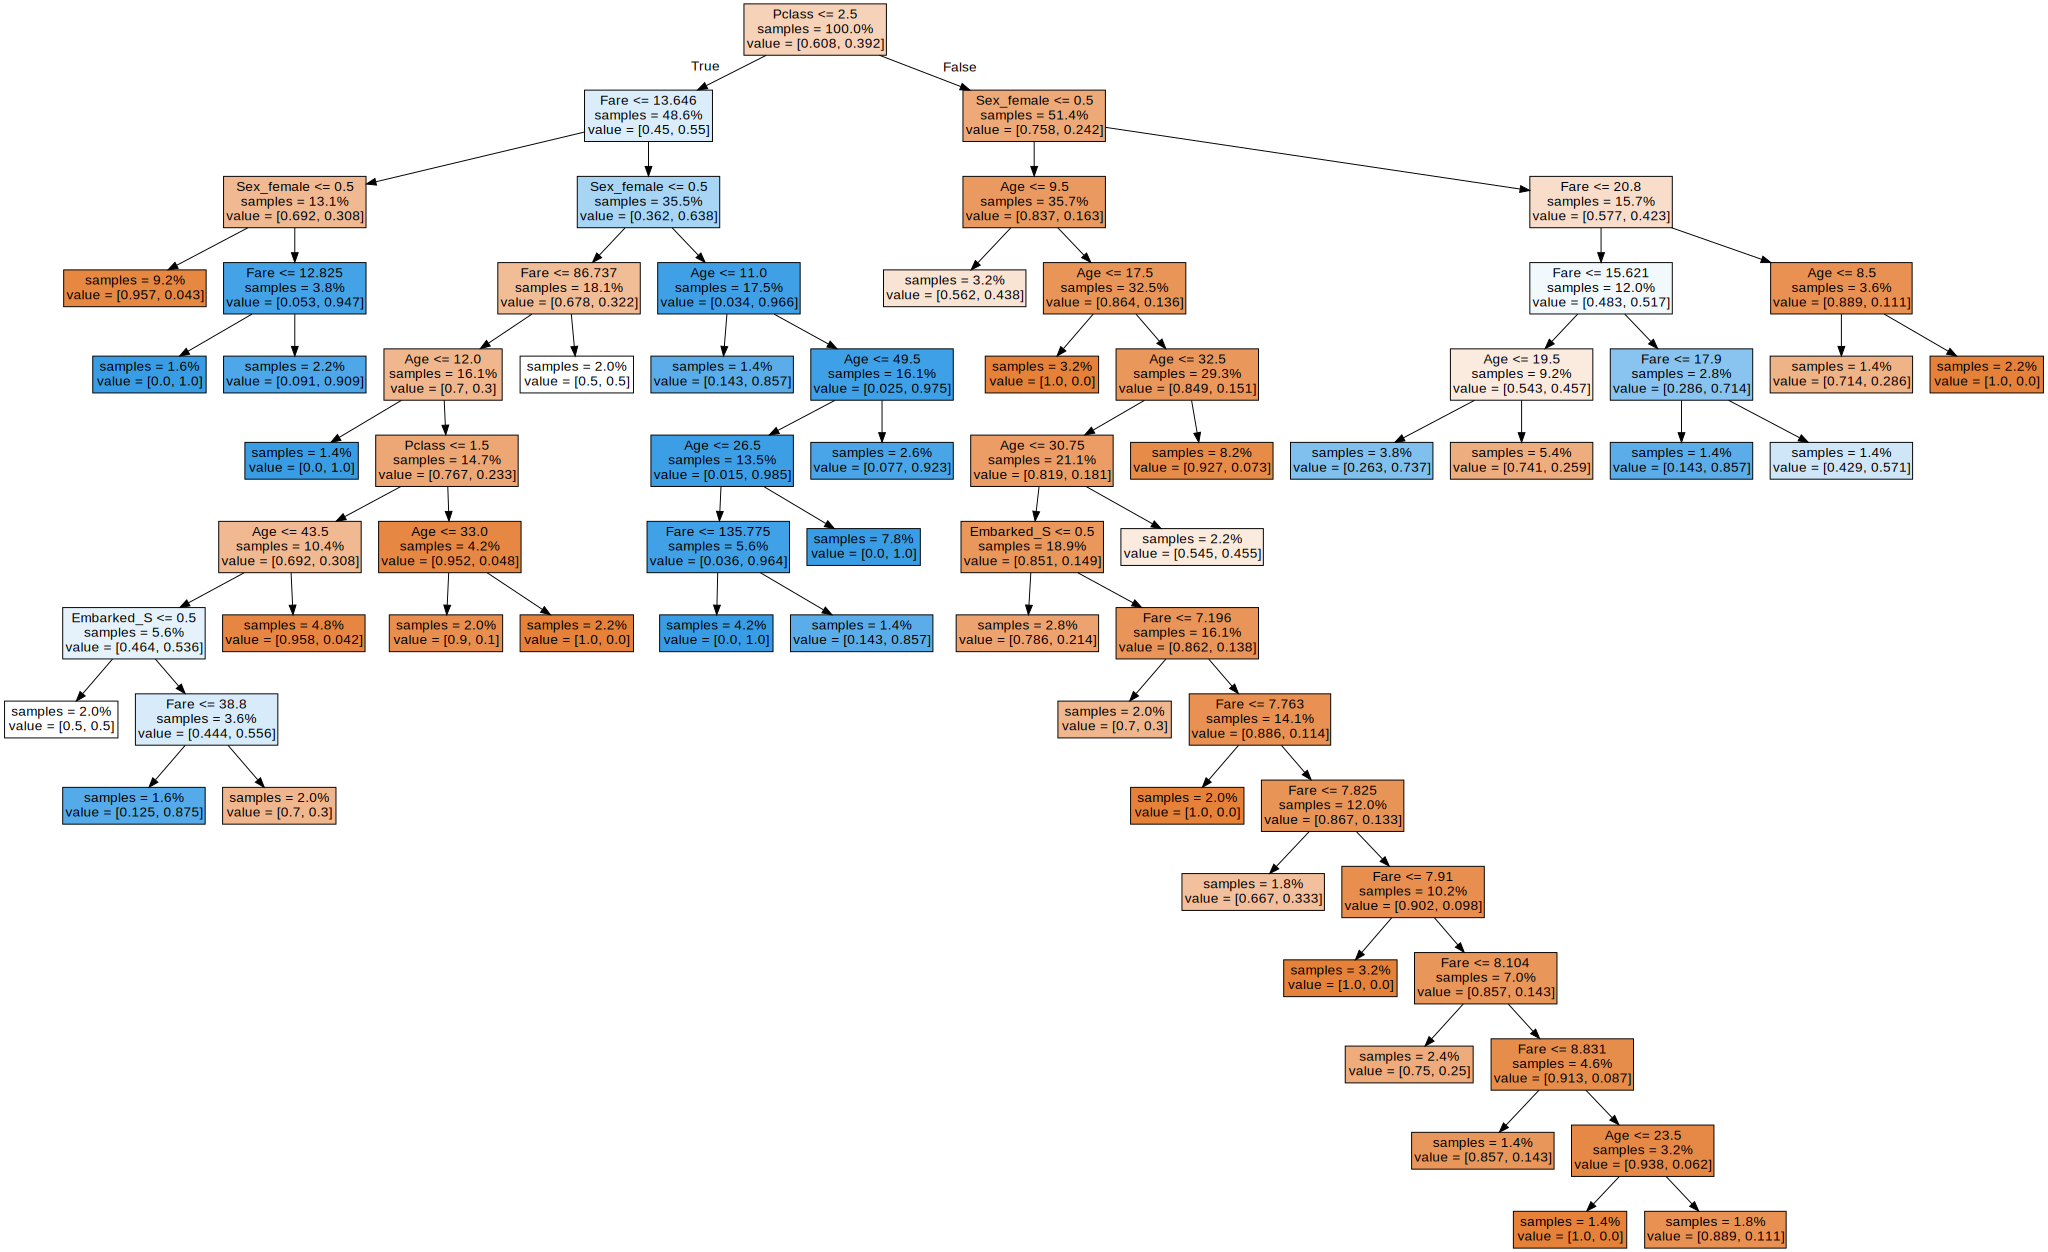

<Figure size 864x864 with 0 Axes>

In [137]:
dot_data = export_graphviz(best_tree_model,
                               feature_names=X_train.columns,  
                               filled=True,  
                               impurity=False, 
                               proportion=True)
graph = graphviz.Source(dot_data)
plt.figure(figsize=(12,12))
display(graph)


## Q13
Run the Random Forest model on the train data

In [138]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

## Q14
How much has the accuracy obtained on train and test compared to the decision tree changed?

In [139]:
Y_train_prediction = rfc.predict(X_train)
Y_test_prediction = rfc.predict(X_test)

rfc_train_accuracy = metrics.accuracy_score(Y_train, Y_train_prediction)
rfc_test_accuracy = metrics.accuracy_score(Y_test, Y_test_prediction)

print('Decision Tree Accuracy for train data:',(rfc_train_accuracy*100).round(2),'%')
print('Decision Tree Accuracy for test data:',(rfc_test_accuracy*100).round(2),'%')

Decision Tree Accuracy for train data: 99.2 %
Decision Tree Accuracy for test data: 78.04 %


### Result:
The accuracy during training is similar to the decision tree and is equal to 98.59%.

The accuracy during the test is about two percent better than the decision tree and is equal to 80.37 percent.

## Q15
The best mode for the parameters bootstrap, min_samples_split, max_depth, n_estimators, criterion, min_samples_leaf

In [144]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 30)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4, 5,6,7,8,9, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 4,5,6]

# Method of selecting samples for training each tree
bootstrap = [True, False]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
     'criterion': ['gini', 'entropy'],
     'bootstrap': bootstrap
    }

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rf_random_search = RandomizedSearchCV(estimator = rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5)

# Fit the random search object to the data
rf_random_search.fit(X_train, Y_train)

# Print the best hyperparameters
print('Best hyperparameters:',  rf_random_search.best_params_)

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Win 10\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Win 10\anaconda3\lib\site-packa

Best hyperparameters: {'n_estimators': 1400, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 147, 'criterion': 'gini', 'bootstrap': True}


In [143]:
rfc = RandomForestClassifier(random_state=0, bootstrap=False, criterion='gini', 
                             max_depth=127, max_features='auto', min_samples_leaf=6,
                             min_samples_split=8, n_estimators=400)
rfc.fit(X_train, Y_train)
Y_train_prediction = rfc.predict(X_train)
Y_test_prediction = rfc.predict(X_test)
rfc_train_accuracy = metrics.accuracy_score(Y_train, Y_train_prediction)
rfc_test_accuracy = metrics.accuracy_score(Y_test, Y_test_prediction)

print('RandomForest Accuracy for train data:',(rfc_train_accuracy*100).round(2),'%')
print('RandomForest Accuracy for test data:',(rfc_test_accuracy*100).round(2),'%')

RandomForest Accuracy for train data: 88.35 %
RandomForest Accuracy for test data: 78.97 %


after using RandomizedSearchCV for optimizing hyperparameters:
* we can see that our accuracy for test data became better

## Q16
Is the gini criterion effective or entropy?
#### In all cases, the random search algorithm proposed the gini criterion.